# Analyza udajov podla krajin
 * Ktore krajiny maju najvacsi podiel liekov na trhu?
 * Z ktorych krajin su lieky najviac predavane?

In [ ]:
! pip install geopandas

     |████████████████████████████████| 1.0MB 21.5MB/s 
     |████████████████████████████████| 6.5MB 43.1MB/s 
     |████████████████████████████████| 15.3MB 291kB/s 


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import geopandas

## Z ktorych krajin su lieky najviac predavane?

In [ ]:
krajiny = ['Slovakia', 'Czech Republic', 'Germany', 'Netherlands', 'Slovenia',
           'France', 'Ireland', 'Hungary', 'Italy', 'Austria', 'Poland', 'Belgium',
           'Cyprus', 'Iceland', 'Denmark', 'Portugal', 'Luxembourg', 'Sweden',
           'Finland', 'Spain', 'Bulgaria', 'Latvia', 'Norway', 'Croatia', 'United Kingdom',
           'Greece', 'Switzerland', 'Lithuania', 'Malta', 'Monaco', 'Turkey']
pocet_bal = [2.656218e+07,1.976097e+07,1.375259e+07,1.218893e+07,8.495347e+06,
             5.313075e+06,4.602191e+06,4.369214e+06,3.118190e+06,1.773538e+06,1.991132e+06,8.622657e+05,
             1.138812e+06,1.111589e+06,9.474987e+05,4.703990e+05,7.149877e+05,5.019233e+05,
             3.865638e+05,2.772255e+05,7.883036e+04,6.260930e+04,9.711686e+03,8.663000e+03,4.299100e+03,
             8.590000e+02,7.296000e+02,7.200000e+01,1.310000e+02,3.000000e+00,1.000000e+00]

table2020 = pd.DataFrame(list(zip(krajiny, pocet_bal)),
               columns =['NAME', 'Počet balení']).set_index('NAME').sort_index()
url = 'https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson'
staty = geopandas.read_file(url).set_index('NAME')
staty['Počet balení'] = [0 for i in range(len(staty))]

for i in range(len(krajiny)):
  staty.loc[krajiny[i],['Počet balení']] = pocet_bal[i]
display(staty.head())

,FID,FIPS,ISO2,ISO3,UN,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry,Počet balení
NAME,,,,,,,,,,,,,
Azerbaijan,0.0,AJ,AZ,AZE,31,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",0.00
Albania,0.0,AL,AL,ALB,8,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",0.00
Armenia,0.0,AM,AM,ARM,51,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",0.00
Bosnia and Herzegovina,0.0,BK,BA,BIH,70,5120,3915238,150,39,17.786,44.169,"POLYGON ((17.64984 42.88908, 17.57853 42.94382...",0.00
Bulgaria,0.0,BU,BG,BGR,100,11063,7744591,150,151,25.231,42.761,"POLYGON ((27.87917 42.84110, 27.89500 42.80250...",78830.36


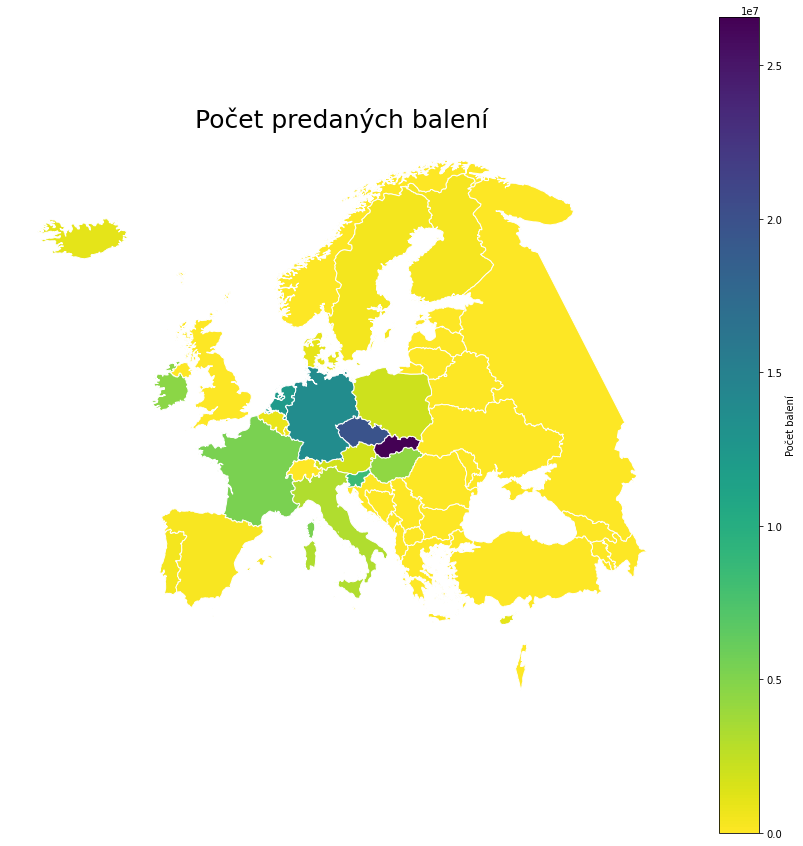

In [ ]:
fig, ax = plt.subplots(1,figsize=(15,15))
staty.plot(column='Počet balení', legend=True, ax=ax,
           cmap='viridis_r', edgecolor='white', 
           legend_kwds={'label': "Počet balení"});
ax.axis('off')
ax.set_title('Počet predaných balení', fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.savefig('mapa_pocet_bal.png')

In [ ]:
krajiny = ['Slovakia', 'Czech Republic', 'Germany', 'Netherlands', 'Slovenia',
           'France', 'Ireland', 'Hungary', 'Italy', 'Austria', 'Poland', 'Belgium',
           'Cyprus', 'Iceland', 'Denmark', 'Portugal', 'Luxembourg', 'Sweden',
           'Finland', 'Spain', 'Bulgaria', 'Latvia', 'Norway', 'Croatia', 'United Kingdom',
           'Greece', 'Switzerland', 'Lithuania', 'Malta', 'Monaco', 'Turkey']
pocet_liekov = [3014, 3512, 3771,1307,2090,
                3049,1194,853,269,954,784,662,
                447,483,304,86,113,326,
                315,277,30,62,58,27,163,
                55,34,14,11,2,1]

staty['Počet liekov'] = [0 for i in range(len(staty))]

for i in range(len(krajiny)):
  staty.loc[krajiny[i],['Počet liekov']] = pocet_liekov[i]
display(staty.head())


,FID,FIPS,ISO2,ISO3,UN,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry,Počet balení,Počet liekov
NAME,,,,,,,,,,,,,,
Azerbaijan,0.0,AJ,AZ,AZE,31,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",0.00,0
Albania,0.0,AL,AL,ALB,8,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",0.00,0
Armenia,0.0,AM,AM,ARM,51,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",0.00,0
Bosnia and Herzegovina,0.0,BK,BA,BIH,70,5120,3915238,150,39,17.786,44.169,"POLYGON ((17.64984 42.88908, 17.57853 42.94382...",0.00,0
Bulgaria,0.0,BU,BG,BGR,100,11063,7744591,150,151,25.231,42.761,"POLYGON ((27.87917 42.84110, 27.89500 42.80250...",78830.36,30


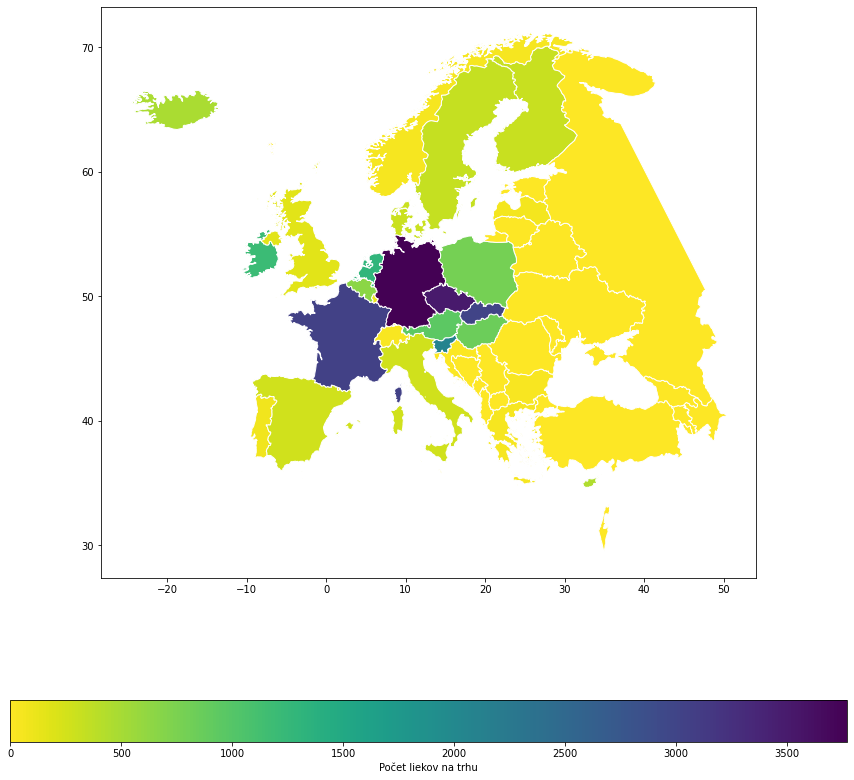

In [ ]:
staty.plot(column='Počet liekov', figsize=(15,15), legend=True, 
           cmap='viridis_r',edgecolor='white',
           legend_kwds={'label': "Počet liekov na trhu",
                    'orientation': "horizontal"});